In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> Loading libraries and data</span>
<a id="loading"></a>

In [1]:
# pip install pandas scikit-learn numpy seaborn missingno plotly
# %pip install nbformat>=4.2.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import missingno as msno #for missing data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px #for histogram


In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# format to 3 dp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
data = pd.read_csv('../data/reData.csv')
# data = pd.read_csv('/content/drive/MyDrive/Research Paper Final year 4/Python Scripts/telecel/data/reData.csv')

In [5]:
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Other_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Female,College of Agriculture and Natural Resources,No,400,Off-campus,Yes,Daily,3,Yes,Yes,Yes,No,Yes,No,Yes,No,No,5.580
1,Female,College of Science,Yes,500,Off-campus,No,Several times a week,2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,2.200
2,Female,College of Engineering,Yes,100,Off-campus,Yes,Daily,2,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,5.950
3,Female,College of Art and Built Environment,Yes,400,On-campus,No,Daily,5,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6.500
4,Female,College of Humanity and Social Science,Yes,200,On-campus,Yes,Several times a week,5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,9.480


**The data set includes information about:**

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers** – gender, age range, and if they have partners and dependents

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> Undertanding the data</span>
<a id = "Undertanding the data" ></a>

In [10]:
data.shape

(768, 18)

In [11]:
data.columns.values

array(['Gender', 'College', 'Churn', 'Level', 'Residence', 'SIM_Usage',
       'Usage_Freq', 'Network_Strength', 'Voice_Calls',
       'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion',
       'Other_Networks', 'Poor_Network_Quality_Coverage',
       'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service',
       'High_Costs_Pricing', 'Monthly_Data_Usage'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           768 non-null    object 
 1   College                          768 non-null    object 
 2   Churn                            768 non-null    object 
 3   Level                            768 non-null    int64  
 4   Residence                        768 non-null    object 
 5   SIM_Usage                        768 non-null    object 
 6   Usage_Freq                       768 non-null    object 
 7   Network_Strength                 768 non-null    int64  
 8   Voice_Calls                      768 non-null    object 
 9   Mobile_Data_Internet             768 non-null    object 
 10  SMS_Text_Messaging               768 non-null    object 
 11  Data_Exhaustion                  768 non-null    object 
 12  Other_Networks        

In [13]:
data.describe()
# data.describe(include=["object", "bool"]) # For non-numeric


,Level,Network_Strength,Monthly_Data_Usage
count,768.000,768.000,768.000
mean,317.839,2.953,5.338
std,156.999,1.434,2.719
min,100.000,1.000,0.500
25%,200.000,2.000,3.103
50%,300.000,3.000,5.430
75%,400.000,4.000,7.655
max,600.000,5.000,10.460


<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> Checking missing values </span>
<a id = "missingvalue" ></a>

In [14]:
data.isnull().sum()

Gender                             0
College                            0
Churn                              0
Level                              0
Residence                          0
SIM_Usage                          0
Usage_Freq                         0
Network_Strength                   0
Voice_Calls                        0
Mobile_Data_Internet               0
SMS_Text_Messaging                 0
Data_Exhaustion                    0
Other_Networks                     0
Poor_Network_Quality_Coverage      0
Insufficient_Data_Allowance        0
Unsatisfactory_Customer_Service    0
High_Costs_Pricing                 0
Monthly_Data_Usage                 0
dtype: int64

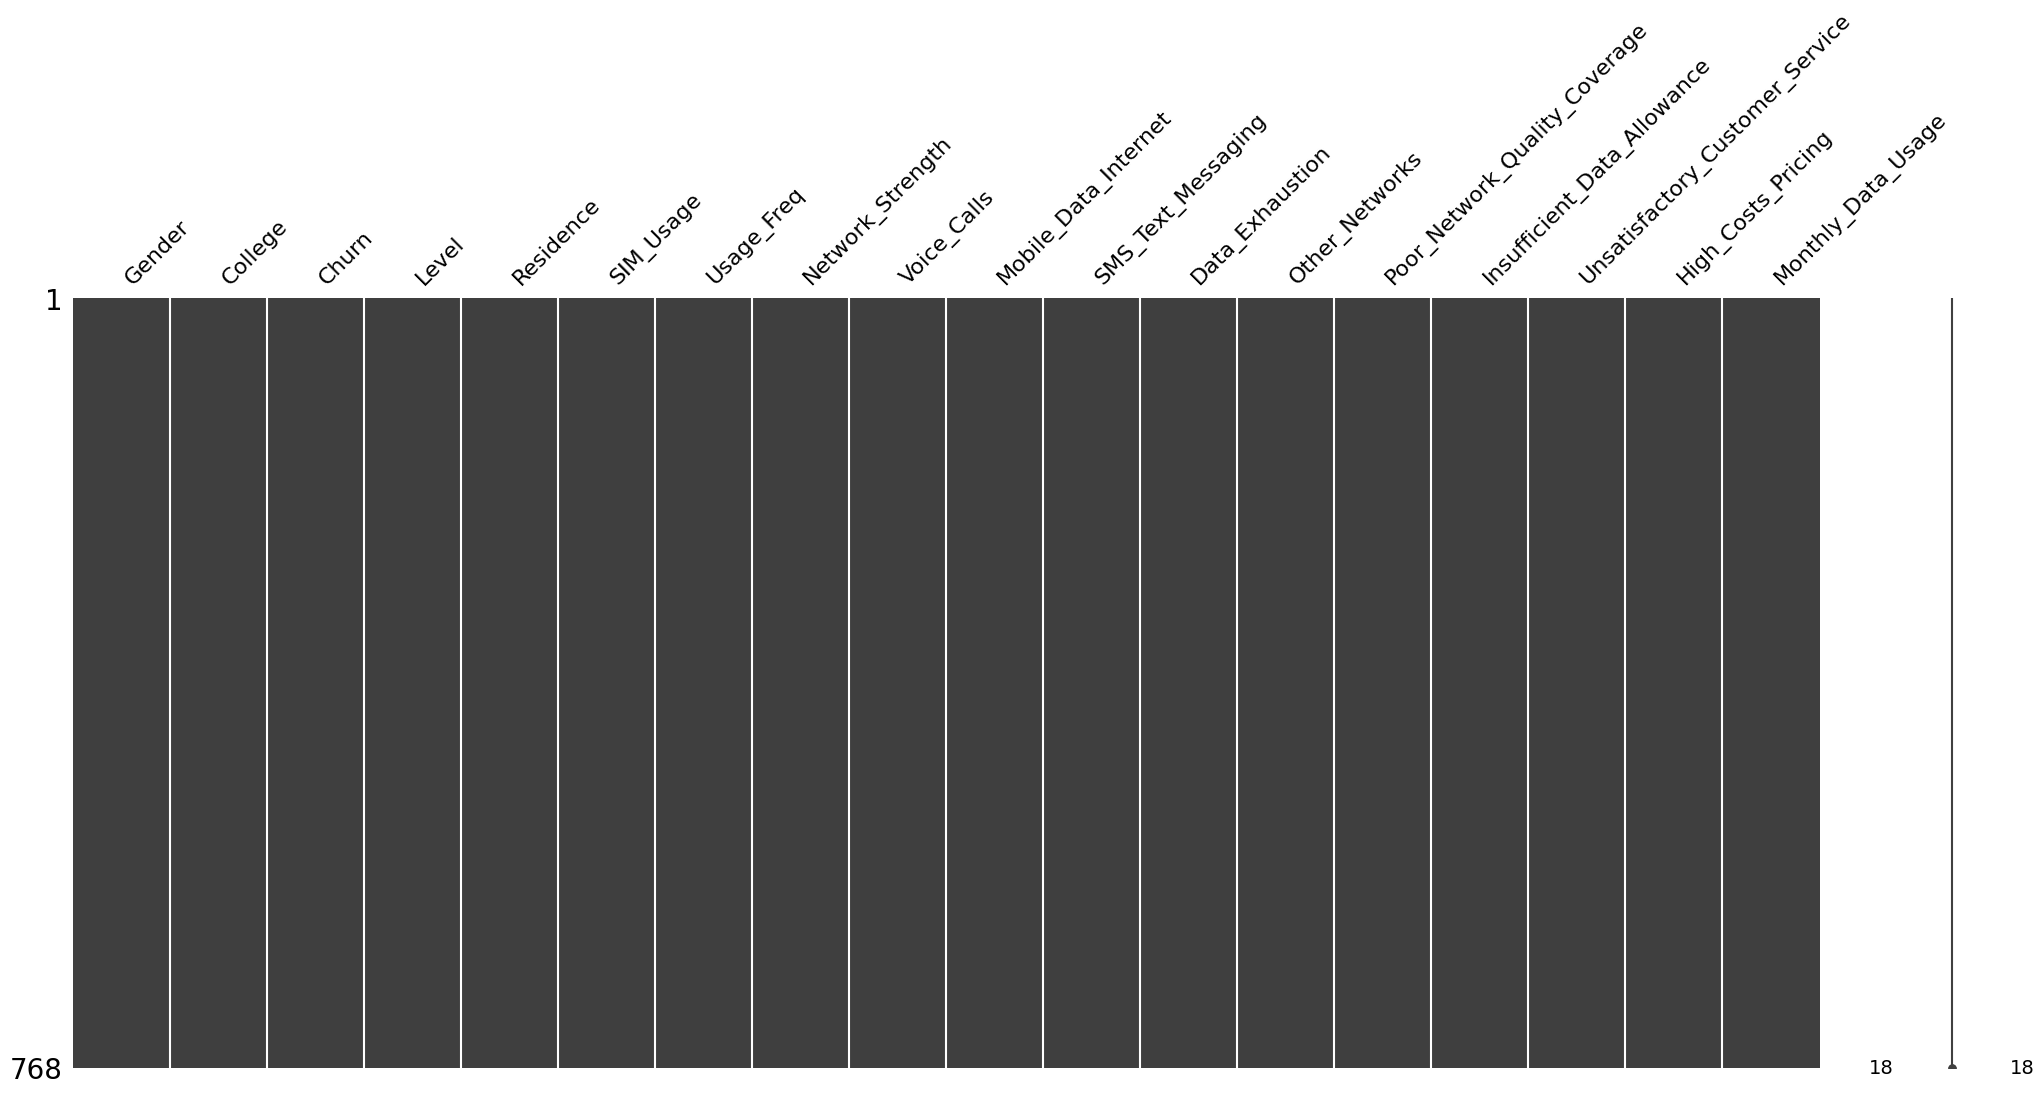

In [15]:
# Visualize missing values as a matrix
msno.matrix(data);

> Using this matrix we can very quickly find the pattern of missingness in the dataset.
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Manipulation </span>
<a id = "8" ></a>

In [16]:
# Assuming 'data' is your DataFrame
college_mapping = {
    'College of Agriculture and Natural Resources': 'CANARSA',
    'College of Science': 'COS',
    'College of Engineering': 'COE',
    'College of Art and Built Environment': 'CABE',
    'College of Humanity and Social Science': 'COHSS',
    'School of Business': 'KSB',
    'College of Health Sciences': 'COH'

}

data['College'] = data['College'].replace(college_mapping, regex=True)

Shorten the colleges names to abbreviations

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> Data Visualization </span>
<a id = "8" ></a>

In [17]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions of Students",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 69.1 % of students switched to another firm.
* Students are 48 % female and 52 % male.

In [18]:
# # Count the number of 'No Churn' and 'Churn' cases for each gender
# no_churn = data["Churn"][data["Churn"] == "No"].groupby(by=data["Gender"]).count().reset_index()
# yes_churn = data["Churn"][data["Churn"] == "Yes"].groupby(by=data["Gender"]).count().reset_index()

# # Rename columns
# no_churn.columns = ["Gender", "No Churn"]
# yes_churn.columns = ["Gender", "Churn"]

# # Merge the two DataFrames
# churn_table = pd.merge(no_churn, yes_churn, on="Gender", how="outer")

# # Calculate the total
# churn_table["Total"] = churn_table["No Churn"] + churn_table["Churn"]
# churn_table
pd.crosstab(data["Churn"], data["Gender"], margins=True)


Gender,Female,Male,All
Churn,,,
No,115,122,237
Yes,254,277,531
All,369,399,768


In [19]:
fig = px.histogram(data, x="Churn", color="College", barmode="group", title="<b>College Churn distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Distribution By Colleges**

- College of Agriculture and Natural Resources: CANR  
- College of Science: COS  
- College of Engineering: COE  
- College of Art and Built Environment: CABE  
- College of Humanity and Social Science: COHSS  
- School of Business: KSB  
- College of Health Sciences: COH

In [20]:
# Boxplot

# Calculate the count of levels for each College
level_counts = data.groupby(['College', 'Level']).size().reset_index(name='Count')

# Create the grouped box plot
fig = px.box(data, x="College", y="Level", color="College", title="<b>College Churn Distribution</b>")

# Add annotations for level counts
for college, level, count in zip(level_counts['College'], level_counts['Level'], level_counts['Count']):
    fig.add_annotation(
        x=college,
        y=level,
        text=str(count),
        showarrow=False,
        font=dict(size=12, color='black')
    )
# Customize layout
fig.update_layout(width=700, height=500)
# Show the plot
fig.show()

# Histogram
# fig = px.histogram(data, x="College", color="Level", barmode="group", title="<b>College Churn distribution<b>")
# fig.update_layout(width=700, height=500, bargap=0.1)
# fig.show()

# Violin
# fig = px.violin(data, x="College", y="Level", box=True, points="all", title="<b>College Churn distribution<b>")
# fig.update_layout(width=700, height=500)
# fig.show()


In [21]:
import plotly.graph_objects as go

labels = data['Usage_Freq'].unique()
values = data['Usage_Freq'].value_counts()

# Define explode values; set non-zero values for the slices you want to explode
explode = [0.1 if label in ['Rarely', 'Occasionally'] else 0 for label in labels]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent+value',
                             hole=.5, pull=explode,
                             textposition='outside')])

fig.update_layout(title_text="<b>Usage Frequency Distribution</b>")

fig.show()


In [22]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="Residence",  title="<b>Churn distribution by Residence</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(data, x="Churn", color="Usage_Freq", title="<b>Usage Frequency Distribution with Churn included </b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Churn Distribution w.r.t. Voice Calls, Mobile Data Internet, and SMS Text Messaging

In [24]:

# Create a list of unique values in the 'Churn' column
churn_values = ['Yes', 'No']
voice = data['Voice_Calls'].value_counts()
mobile_data = data['Mobile_Data_Internet'].value_counts()
SMS_messaging = data['SMS_Text_Messaging'].value_counts()
fig = go.Figure()

# Voice Calls
fig.add_trace(go.Bar(
    x=churn_values,
    y=voice,
    name='Voice Calls'
))

# Mobile Data Internet
fig.add_trace(go.Bar(
    x=churn_values,
    y=mobile_data,
    name='Mobile Data Internet'
))

# SMS Text Messaging
fig.add_trace(go.Bar(
    x=churn_values,
    y=SMS_messaging,
    name='SMS Text Messaging'
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Voice Calls, Mobile Data Internet, and SMS Text Messaging</b>")

fig.show()
data['SMS_Text_Messaging'].value_counts()

SMS_Text_Messaging
Yes    618
No     150
Name: count, dtype: int64

Churn Distribution w.r.t. Poor_Network_Quality_Coverage, Insufficient_Data_Allowance,Unsatisfactory_Customer_Service and High_Costs_Pricing

In [25]:
fig = go.Figure()

# Poor_Network_Quality_Coverage
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Voice_Calls'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Poor_Network_Quality_Coverage',
))

# Insufficient_Data_Allowance
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['Mobile_Data_Internet'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Mobile Data Internet',
))

# Unsatisfactory_Customer_Service
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'Unsatisfactory_Customer_Service',
))
# High_Costs_Pricing
fig.add_trace(go.Bar(
  x = ['Churn:No', 'Churn:Yes'],
  y = data[data['SMS_Text_Messaging'] == 'Yes']['Churn'].value_counts().tolist(),
  name = 'High_Costs_Pricing',
))


fig.update_layout(title_text="<b>Churn Distribution w.r.t. Poor_Network_Quality_Coverage, Insufficient_Data_Allowance,Unsatisfactory_Customer_Service and High_Costs_Pricing</b>")

fig.show()


In [26]:
fig = px.box(data, x='Churn', y = 'Level')

# Update yaxis properties
fig.update_yaxes(title_text='Level (Year)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Level vs Churn</b>',
)

fig.show()


In [27]:
fig = go.Figure(data=[go.Bar(x=data['Network_Strength'].value_counts().index,
                             y=data['Network_Strength'].value_counts().values,
                             marker=dict(color=px.colors.sequential.Plasma))])

fig.update_layout(title_text="<b> Network_Strength Distribution</b>",
                  xaxis_title="Network Strength",
                  yaxis_title="Count")

fig.show()



In [28]:

labels = data['Other_Networks'].unique()
values = data['Other_Networks'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent+value')])

fig.update_layout(title_text="<b>Multiple Network Distribution</b>")

fig.show()


In [29]:
# # Visualize the distribution of 'Monthly_Data_Usage'
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Monthly_Data_Usage'], kde=True)
# plt.title('Distribution of Monthly Data Usage')
# plt.show()

**Distribution of Monthly_Data_Usage by Data_Exhaustion**

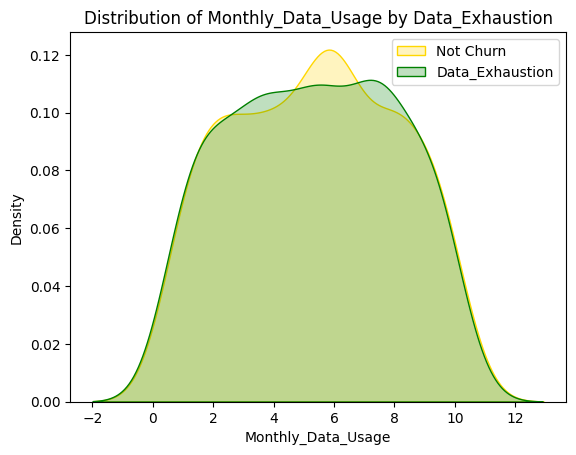

In [30]:
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'No') ],
                color="Gold", fill = True);
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Data_Exhaustion"] == 'Yes') ],
                ax =ax, color="Green", fill= True);
ax.legend(["Not Churn","Data_Exhaustion"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly_Data_Usage');
ax.set_title('Distribution of Monthly_Data_Usage by Data_Exhaustion');


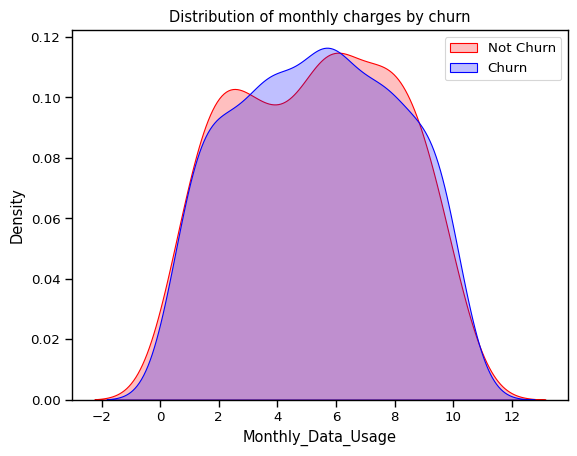

In [31]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'No') ],
                color="Red", fill = True);
ax = sns.kdeplot(data.Monthly_Data_Usage[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly_Data_Usage');
ax.set_title('Distribution of monthly charges by churn');


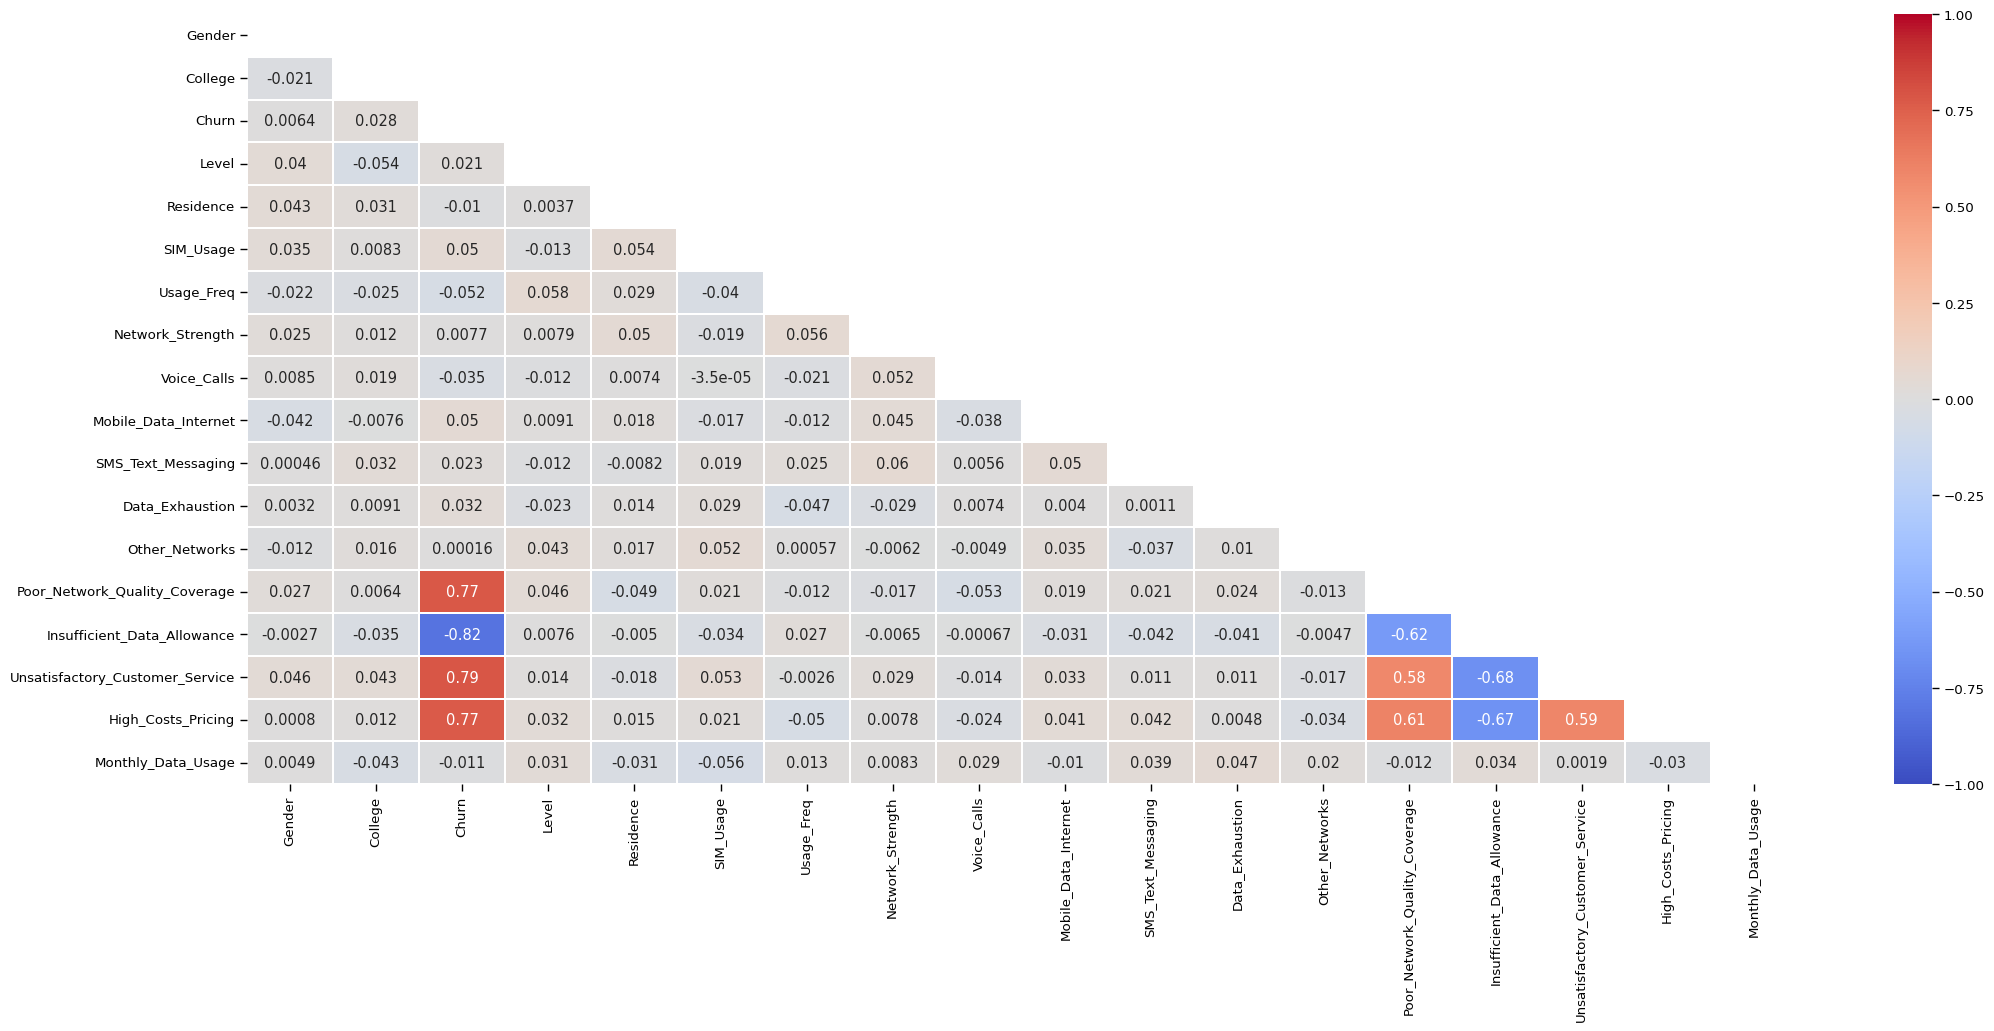

In [32]:
plt.figure(figsize=(25, 10))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;">Model Preprocessing</span>
<a id = Model Preprocessing ></a>

In [33]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


In [34]:
# Display the encoded values
encoded_values

,Feature,Category,Encoded Value
0,Gender,Female,0
1,Gender,Male,1
2,College,CABE,0
3,College,CANARSA,1
4,College,COE,2
5,College,COHSS,3
6,College,COS,4
7,College,KSB,5
8,Churn,No,0
9,Churn,Yes,1


In [35]:
# Now your data is ready for machine learning algorithms
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Other_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,0,1,0,400,0,1,0,3,1,1,1,0,1,0,1,0,0,5.580
1,0,4,1,500,0,0,4,2,1,1,0,1,1,1,1,1,1,2.200
2,0,2,1,100,0,1,0,2,1,0,1,0,1,1,1,1,1,5.950
3,0,0,1,400,1,0,0,5,0,0,1,1,1,1,1,1,1,6.500
4,0,3,1,200,1,1,4,5,1,1,1,1,1,1,1,1,1,9.480


In [36]:
# Splitting the data into training and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")

Data preprocessing completed!


In [37]:
plt.figure(figsize=(14,7))
data.corr()['Churn'].sort_values(ascending = False)

Churn                              1.000
Insufficient_Data_Allowance        0.816
Unsatisfactory_Customer_Service    0.786
Poor_Network_Quality_Coverage      0.774
High_Costs_Pricing                 0.768
Usage_Freq                         0.045
Voice_Calls                        0.035
Data_Exhaustion                    0.032
Monthly_Data_Usage                 0.012
Gender                             0.006
Other_Networks                    -0.000
Level                             -0.001
College                           -0.010
Residence                         -0.010
SMS_Text_Messaging                -0.023
Network_Strength                  -0.040
SIM_Usage                         -0.050
Mobile_Data_Internet              -0.050
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [38]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [39]:
data.columns

Index(['Gender', 'College', 'Churn', 'Level', 'Residence', 'SIM_Usage',
       'Usage_Freq', 'Network_Strength', 'Voice_Calls', 'Mobile_Data_Internet',
       'SMS_Text_Messaging', 'Data_Exhaustion', 'Other_Networks',
       'Poor_Network_Quality_Coverage', 'Insufficient_Data_Allowance',
       'Unsatisfactory_Customer_Service', 'High_Costs_Pricing',
       'Monthly_Data_Usage'],
      dtype='object')

C:\Users\Reaper\AppData\Local\Temp\ipykernel_18900\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Reaper\AppData\Local\Temp\ipykernel_18900\3330901477.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




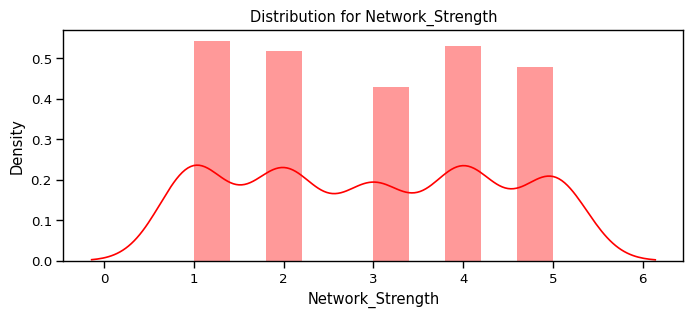

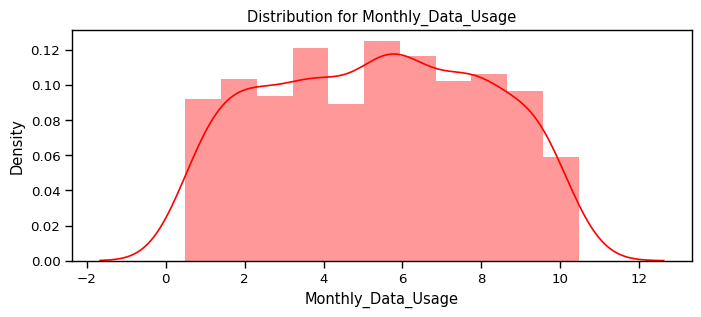

In [40]:
num_cols = [ 'Network_Strength', 'Monthly_Data_Usage']
for feat in num_cols: distplot(feat, data)

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [41]:
# Initialize the models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nn = MLPClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# List of models
models = [lr,rf,knn, svm, gb, nn, lgbm]

# Define the hyperparameters for each model
hyperparameters = {
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10)
    },
    'KNeighborsClassifier': {
        'n_neighbors': randint(1, 10)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.001, 1)
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': (randint(10, 100).rvs(), randint(10, 100).rvs()),
        'alpha': uniform(0.0001, 0.1)
    },
    'LGBMClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    }
}

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")


Tuning LogisticRegression...


d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projects\Research Paper Final year 4\.venv\L

Best parameters: {'C': 7.180725777960454, 'penalty': 'l2'}
Best score: 0.982073837131814

Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 1.0

Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7817672930827669

Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.8469412235105958

Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.12236203565420874, 'max_depth': 8, 'n_estimators': 70}
Best score: 0.9967479674796749

Tuning MLPClassifier...
Best parameters: {'alpha': 0.005741157902710026, 'hidden_layer_sizes': 98}
Best score: 0.9723177395708383

Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

In [42]:
# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...
Best parameters: {'C': 7.180725777960454, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[ 44   6]
 [  0 104]]



Tuning RandomForestClassifier...


d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projects\Research Paper Final year 4\.venv\L

Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 1.0
Confusion matrix for RandomForestClassifier:
[[ 50   0]
 [  0 104]]



Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7817672930827669
Confusion matrix for KNeighborsClassifier:
[[ 18  32]
 [  4 100]]



Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.8469412235105958
Confusion matrix for SVC:
[[ 32  18]
 [  2 102]]



Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.12236203565420874, 'max_depth': 8, 'n_estimators': 70}
Best score: 0.9967479674796749
Confusion matrix for GradientBoostingClassifier:
[[ 50   0]
 [  0 104]]



Tuning MLPClassifier...
Best parameters: {'alpha': 0.005741157902710026, 'hidden_layer_sizes': 98}
Best score: 0.9723177395708383
Confusion matrix for MLPClassifier:
[[ 41   9]
 [  0 104]]



Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly 

In [43]:
# confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...
Best parameters: {'C': 7.180725777960454, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[ 44   6]
 [  0 104]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.95      1.00      0.97       104

    accuracy                           0.96       154
   macro avg       0.97      0.94      0.95       154
weighted avg       0.96      0.96      0.96       154




Tuning RandomForestClassifier...


d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projects\Research Paper Final year 4\.venv\L

Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 1.0
Confusion matrix for RandomForestClassifier:
[[ 50   0]
 [  0 104]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       104

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154




Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7817672930827669
Confusion matrix for KNeighborsClassifier:
[[ 18  32]
 [  4 100]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.82      0.36      0.50        50
           1       0.76      0.96      0.85       104

    accuracy                           0.77       154
   macro avg       0.79      0.66      0.67    


Tuning LogisticRegression...
Best parameters: {'C': 7.180725777960454, 'penalty': 'l2'}
Best score: 0.982073837131814
Confusion matrix for LogisticRegression:
[[ 44   6]
 [  0 104]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        50
           1       0.95      1.00      0.97       104

    accuracy                           0.96       154
   macro avg       0.97      0.94      0.95       154
weighted avg       0.96      0.96      0.96       154





d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\Research Paper Final year 4\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Projects\Research Paper Final year 4\.venv\L

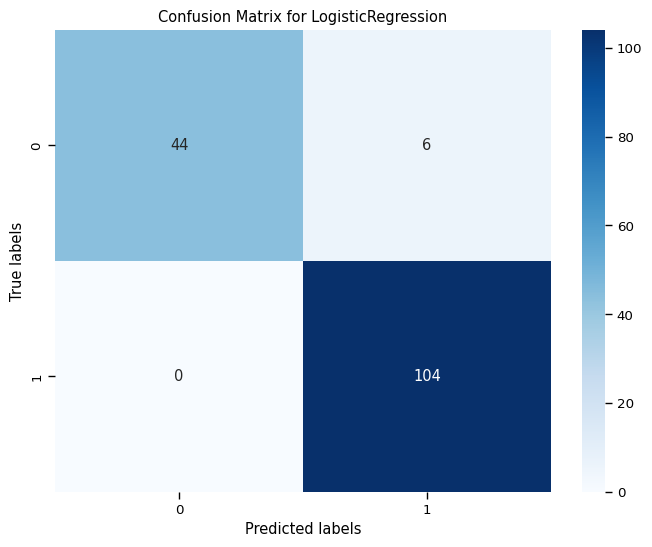


Tuning RandomForestClassifier...
Best parameters: {'max_depth': 7, 'n_estimators': 142}
Best score: 1.0
Confusion matrix for RandomForestClassifier:
[[ 50   0]
 [  0 104]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       104

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154





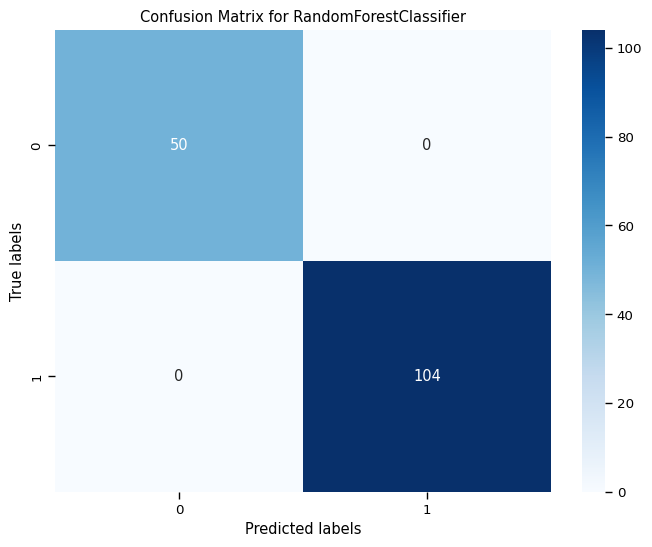


Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 3}
Best score: 0.7817672930827669
Confusion matrix for KNeighborsClassifier:
[[ 18  32]
 [  4 100]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.82      0.36      0.50        50
           1       0.76      0.96      0.85       104

    accuracy                           0.77       154
   macro avg       0.79      0.66      0.67       154
weighted avg       0.78      0.77      0.73       154





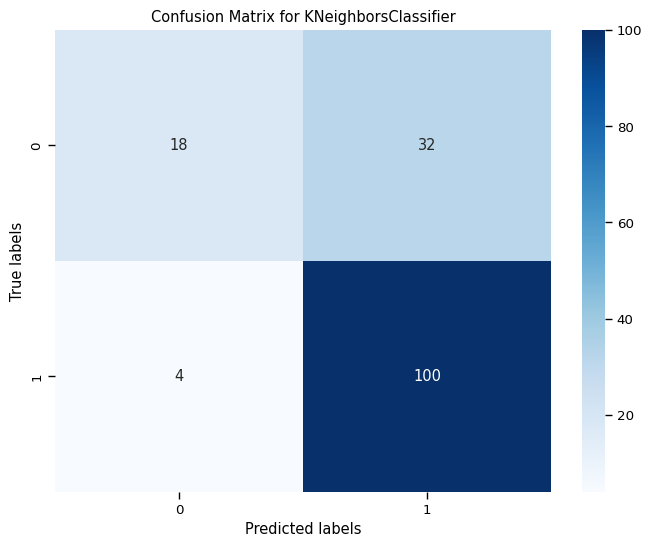


Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.8469412235105958
Confusion matrix for SVC:
[[ 32  18]
 [  2 102]]


Classification report for SVC:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        50
           1       0.85      0.98      0.91       104

    accuracy                           0.87       154
   macro avg       0.90      0.81      0.84       154
weighted avg       0.88      0.87      0.86       154





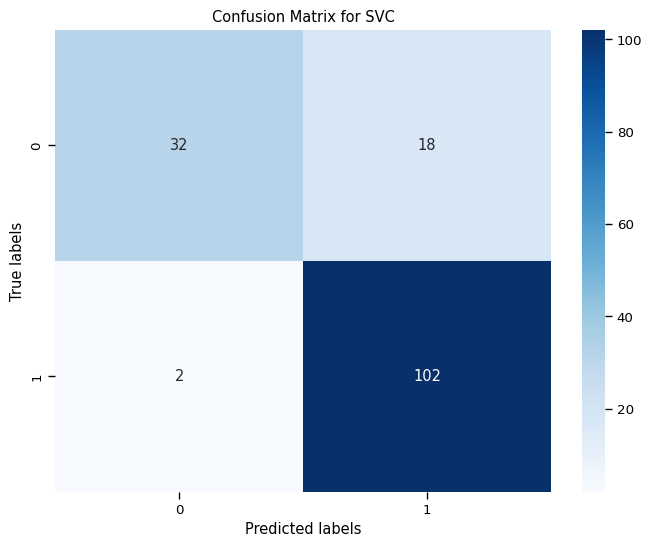


Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.12236203565420874, 'max_depth': 8, 'n_estimators': 70}
Best score: 0.9967479674796749
Confusion matrix for GradientBoostingClassifier:
[[ 50   0]
 [  0 104]]


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00       104

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154





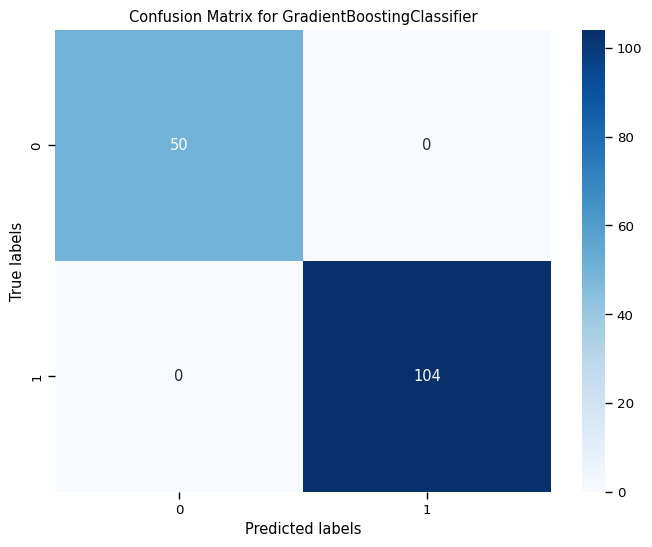


Tuning MLPClassifier...
Best parameters: {'alpha': 0.005741157902710026, 'hidden_layer_sizes': 98}
Best score: 0.9723177395708383
Confusion matrix for MLPClassifier:
[[ 41   9]
 [  0 104]]


Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        50
           1       0.92      1.00      0.96       104

    accuracy                           0.94       154
   macro avg       0.96      0.91      0.93       154
weighted avg       0.95      0.94      0.94       154





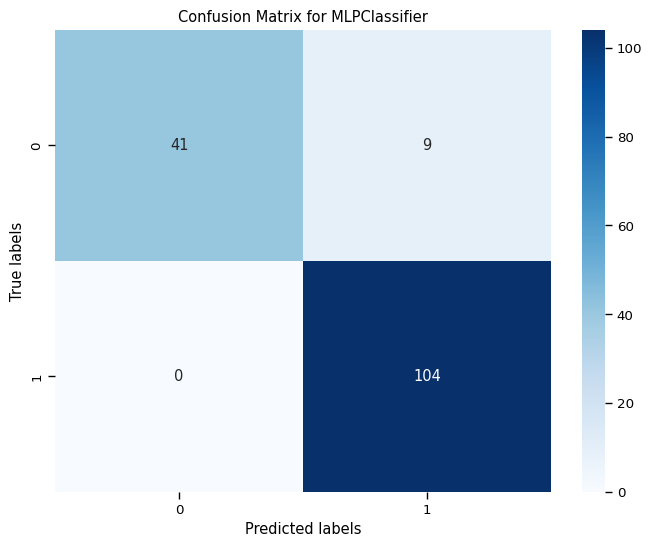


Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 427, number of negative: 187
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.695440 -> initscore=0.825675
[LightGBM] [Info] Start training from score 0.825675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

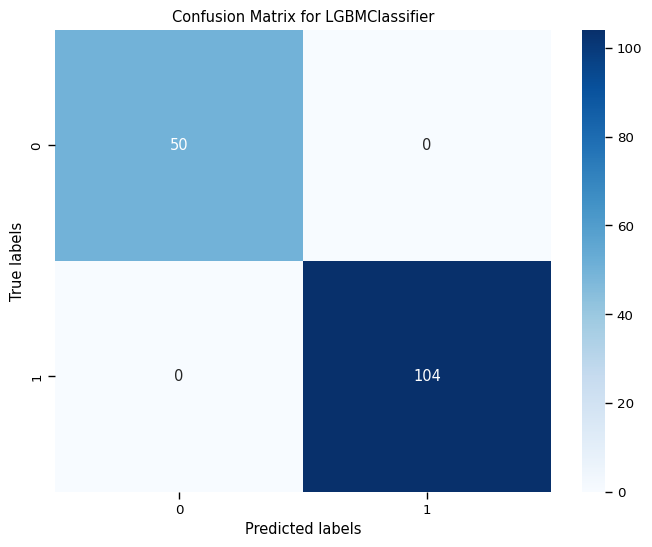

In [44]:
# plot the confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")

    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)

    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)

    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")

    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)

    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> Streamlit </span>
<a id = "modelprediction" ></a>

In [48]:
# pip install streamlit

In [47]:
# pip install streamlit